# Tarjetas

dataset: https://docs.google.com/spreadsheets/d/1E2QvH18DyNDw1eGqU40D_KHSEfSzbipV/edit?usp=sharing&ouid=115931210603772521641&rtpof=true&sd=true


In [60]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
#!pip install openpyxl

In [61]:
df = pd.read_csv('data_ejs/tarjetas.xlsx - Sheet1.csv')

In [62]:
df.head()

,Unnamed: 0,PreseTaciOn_Fecha,FeCha_de_Pago,cod_clearing,desc_creaing,NRo_Liquidacion,cod_sucursal,Cod_comercio,Cod_pagadora,Cod_marca_producto,importe_concepto
0,0,2022-06-15 00:00:00,2022-07-01 00:00:00,1009,VENTAS C/DESCUENTO CONTADO,27822,716,25107406,156,VISA CREDITO,5096.00000
1,1,2022-06-15 00:00:00,2022-07-01 00:00:00,1011,VENTAS C/DTO CUOTAS FINANC. OTORG.,27822,716,25107406,156,VISA CREDITO,413500.60000
2,2,2022-06-15 00:00:00,2022-07-01 00:00:00,2031,ARANCEL,27822,716,25107406,156,VISA CREDITO,7534.70000
3,3,2022-06-15 00:00:00,2022-07-01 00:00:00,2040,PROMO CUOTAS AHORA 12/18,27822,716,25107406,156,VISA CREDITO,18416.85000
4,4,2022-06-15 00:00:00,2022-07-01 00:00:00,2800,TOTAL DEDUCCIONES,27822,716,25107406,156,VISA CREDITO,49585.43000


### 1- Pasar todos los nombres de las columnas a minusculas

In [63]:
df.columns = df.columns.str.lower()
df

,unnamed: 0,presetacion_fecha,fecha_de_pago,cod_clearing,desc_creaing,nro_liquidacion,cod_sucursal,cod_comercio,cod_pagadora,cod_marca_producto,importe_concepto
0,0,2022-06-15 00:00:00,2022-07-01 00:00:00,1009,VENTAS C/DESCUENTO CONTADO,27822,716,25107406,156,VISA CREDITO,5096.00000
1,1,2022-06-15 00:00:00,2022-07-01 00:00:00,1011,VENTAS C/DTO CUOTAS FINANC. OTORG.,27822,716,25107406,156,VISA CREDITO,413500.60000
2,2,2022-06-15 00:00:00,2022-07-01 00:00:00,2031,ARANCEL,27822,716,25107406,156,VISA CREDITO,7534.70000
3,3,2022-06-15 00:00:00,2022-07-01 00:00:00,2040,PROMO CUOTAS AHORA 12/18,27822,716,25107406,156,VISA CREDITO,18416.85000
4,4,2022-06-15 00:00:00,2022-07-01 00:00:00,2800,TOTAL DEDUCCIONES,27822,716,25107406,156,VISA CREDITO,49585.43000
...,...,...,...,...,...,...,...,...,...,...,...
47275,47275,2022-07-28 00:00:00,2022-07-29 00:00:00,2900,TOTAL LIQUIDACION,143176,519,25892918,82,VISA DEBITO,97185.50000
47276,47276,2022-07-28 00:00:00,2022-07-29 00:00:00,5104,"IVA CRED.FISC.COMERCIO S/ARANC 21,00%",143176,519,25892918,82,VISA DEBITO,166.03000
47277,47277,2022-07-28 00:00:00,2022-07-29 00:00:00,5204,RETENCION ING.BRUTOS SIRTAC,143176,519,25892918,82,VISA DEBITO,691.84000
47278,47278,2022-07-28 00:00:00,2022-07-29 00:00:00,5900,SUBTOTAL NETO DE PAGOS,143176,519,25892918,82,VISA DEBITO,97185.50000


In [64]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


### 2-Cuantas sucursales únicas hay? ¿Cuáles?

In [65]:
print(f"Cantidad de sucursales: {len(df['cod_sucursal'].unique())}")
print(f'Son: {df["cod_sucursal"].unique()}')

Cantidad de sucursales: 5
Son: [716  98 671 519 241]


### 3- Cuantas tarjetas de crédito distitas hay? ¿Cuáles?
¿Se te ocurre un nombre mejor para esa columna?

In [66]:
df.columns = df.columns.str.replace('cod_marca_producto','tipos_de_tarjeta')
df['tipos_de_tarjeta'].unique()

array(['VISA CREDITO', 'VISA DEBITO', 'MASTERCARD', 'MASTERCARD DEBIT',
       'MAESTRO', 'ARGENCARD'], dtype=object)

### 4- Cuants filas y columnas hay?


In [67]:
df.shape

(47280, 11)

### 5- ¿Cuanto suma el total de importe_concepto?


In [68]:
df['importe_concepto'].sum()

4145618332.503

In [69]:
df['presetacion_fecha'] = pd.to_datetime(df['presetacion_fecha'])
df['mes'] = df['presetacion_fecha'].dt.month
df['dia'] = df['presetacion_fecha'].dt.day

In [70]:
cobro_por_dia = df.groupby('dia')['importe_concepto'].sum().to_frame('cobros')
cobro_por_dia.head()

,cobros
dia,
1,147931414.40300
3,438875.69000
4,409954820.13500
5,100575051.42700
6,112211659.72500


### 6- ¿Cuanto dinero se cobro por mes? Cree un lineplot para gráficarlo


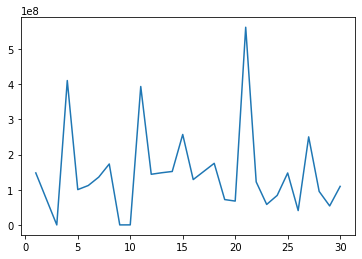

In [71]:
plt.plot(cobro_por_dia.index,cobro_por_dia)
plt.show()

### 7- Cuanto dinero se cobro por sucursal?


In [72]:
df_sucursales = df.groupby('cod_sucursal')
df_sucursales['importe_concepto'].sum()

cod_sucursal
98     140145070.59500
241       977301.92800
519   3621125310.58000
671    241882867.53100
716    141487781.86900
Name: importe_concepto, dtype: float64

### 8- Cuanto dinero se cobro por mes por sucursal?


In [73]:
gr_mes_sucursal = df.groupby(['mes','cod_sucursal'])['importe_concepto'].sum()
gr_dia_sucursal = df.groupby(['dia','cod_sucursal'])['importe_concepto'].sum()
gr_mes_sucursal

mes  cod_sucursal
6    98               37767513.41400
     241                210112.87100
     519            1160639763.92000
     671             104994985.97700
     716              46176775.03200
7    98              102377557.18100
     241                767189.05700
     519            2460485546.66000
     671             136887881.55400
     716              95311006.83700
Name: importe_concepto, dtype: float64

### 9- Cuanto dinero se cobro por mes por sucursal y por descreaing?

In [74]:
df.groupby(['mes','cod_sucursal','desc_creaing'])['importe_concepto'].sum()

mes  cod_sucursal  desc_creaing                                
6    98             PERCEPCION IVA R.G. 2408   3,00 %                 4432.43000
                   ARANCEL                                          171288.73000
                   CRED FISCAL AHORA 12/18 VTA EN CUOTAS 10,50%      45355.84400
                   CRED. FISCAL PAG.S/DTO.FIN.OTORG 21,00%            1361.35000
                   CRED.FISC.LEY 25063 PAG.S/DTO.F.OTORG. 10,50        111.37000
                                                                       ...      
7    716           SUBTOTAL NETO DE PAGOS                         22441842.32000
                   TOTAL DEDUCCIONES                               1829484.44000
                   TOTAL LIQUIDACION                              22417859.80000
                   VENTAS C/DESCUENTO CONTADO                     15726496.15000
                   VENTAS C/DTO CUOTAS FINANC. OTORG.              8520848.09000
Name: importe_concepto, Length: 236, dtype: f

### 10- Pase a columnas los valores presentes en desc_creaing y ponga los importes como valores y en el indice la fecha de pago y el codigo de comercio

In [75]:
pivot_desc = pd.pivot_table(df,values = 'importe_concepto',index=['fecha_de_pago','cod_comercio'],columns='desc_creaing')
pivot_desc

desc_creaing                       PERCEPCION IVA R.G. 2408   3,00 %  \
fecha_de_pago       cod_comercio                                       
2022-07-01 00:00:00 4547438                               1172.54333   
                    14935528                                     NaN   
                    14935556                                     NaN   
                    14935569                                     NaN   
                    15537297                                80.55000   
...                                                              ...   
2022-07-29 00:00:00 25108471                                94.32000   
                    25108573                                96.97000   
                    25877861                                     NaN   
                    25892842                               313.88000   
                    25892918                               120.94000   

desc_creaing                      AJUSTE SIRTAC JUL. 1RA QUINC  \
fecha_de_pago       cod_comercio                                 
2022-07-01 00:00:00 4547438                                NaN   
                    14935528                               NaN   
                    14935556                               NaN   
                    14935569                               NaN   
                    15537297                               NaN   
...                                                        ...   
2022-07-29 00:00:00 25108471                               NaN   
                    25108573                               NaN   
                    25877861                               NaN   
                    25892842                               NaN   
                    25892918                               NaN   

desc_creaing                      AJUSTE SIRTAC JUNIO 2DA QUINC  \
fecha_de_pago       cod_comercio                                  
2022-07-01 00:00:00 4547438                                 NaN   
                    14935528                                NaN   
                    14935556                                NaN   
                    14935569                                NaN   
                    15537297                                NaN   
...                                                         ...   
2022-07-29 00:00:00 25108471                                NaN   
                    25108573                                NaN   
                    25877861                                NaN   
                    25892842                                NaN   
                    25892918                                NaN   

desc_creaing                      ARANCEL                                       \
fecha_de_pago       cod_comercio                                                 
2022-07-01 00:00:00 4547438                                        27239.14800   
                    14935528                                          44.98000   
                    14935556                                         170.95000   
                    14935569                                         428.31000   
                    15537297                                        2685.16000   
...                                                                        ...   
2022-07-29 00:00:00 25108471                                        1602.32500   
                    25108573                                        1919.29000   
                    25877861                                         114.09000   
                    25892842                                        5887.19000   
                    25892918                                        2411.62500   

desc_creaing                      CARGO  SISTEMA CUOTAS MENS                    \
fecha_de_pago       cod_comercio                                                 
2022-07-01 00:00:00 4547438                                                NaN   
                   

### 11- Quedarse solo con tarjeta visa. Crear una columna que sume 'VENTAS C/DESCUENTO CONTADO' con
                                'VENTAS C/DTO CUOTAS FINANC. OTORG.'

In [76]:
df_visa = df[df['tipos_de_tarjeta'].str.contains('VISA')]
pivot_visa = pd.pivot_table(df_visa,values = 'importe_concepto',index=['fecha_de_pago','cod_comercio'],columns='desc_creaing')
pivot_visa.columns = pivot_visa.columns.str.strip()
pivot_visa
pivot_visa['suma_ventas'] = pivot_visa['VENTAS C/DESCUENTO CONTADO']+pivot_visa['VENTAS C/DTO CUOTAS FINANC. OTORG.']
pivot_visa

desc_creaing                      PERCEPCION IVA R.G. 2408   3,00 %  \
fecha_de_pago       cod_comercio                                      
2022-07-01 00:00:00 25098024                              205.28500   
                    25107096                               96.93000   
                    25107105                              186.32000   
                    25107118                              227.91000   
                    25107120                              141.02000   
...                                                             ...   
2022-07-29 00:00:00 25108471                               94.32000   
                    25108573                               96.97000   
                    25877861                                    NaN   
                    25892842                              313.88000   
                    25892918                              120.94000   

desc_creaing                      AJUSTE SIRTAC JUL. 1RA QUINC  \
fecha_de_pago       cod_comercio                                 
2022-07-01 00:00:00 25098024                               NaN   
                    25107096                               NaN   
                    25107105                               NaN   
                    25107118                               NaN   
                    25107120                               NaN   
...                                                        ...   
2022-07-29 00:00:00 25108471                               NaN   
                    25108573                               NaN   
                    25877861                               NaN   
                    25892842                               NaN   
                    25892918                               NaN   

desc_creaing                      AJUSTE SIRTAC JUNIO 2DA QUINC    ARANCEL  \
fecha_de_pago       cod_comercio                                             
2022-07-01 00:00:00 25098024                                NaN 4629.63333   
                    25107096                                NaN 1253.89333   
                    25107105                                NaN 3712.88000   
                    25107118                                NaN 4466.23000   
                    25107120                                NaN 2076.20667   
...                                                         ...        ...   
2022-07-29 00:00:00 25108471                                NaN 1602.32500   
                    25108573                                NaN 1919.29000   
                    25877861                                NaN  114.09000   
                    25892842                                NaN 5887.19000   
                    25892918                                NaN 2411.62500   

desc_creaing                      CARGOS DE ENTIDAD  \
fecha_de_pago       cod_comercio                      
2022-07-01 00:00:00 25098024                    NaN   
                    25107096                    NaN   
                    25107105                    NaN   
                    25107118                    NaN   
                    25107120                    NaN   
...                                             ...   
2022-07-29 00:00:00 25108471                    NaN   
                    25108573                    NaN   
                    25877861                    NaN   
                    25892842                    NaN   
                    25892918                    NaN   

desc_creaing                      CRED FISCAL AHORA 12/18 VTA EN CUOTAS 10,50%  \
fecha_de_pago       cod_comercio                                                 
2022-07-01 00:00:00 25098024                                        2721.19500   
                    25107096                                         699.83300   
                    25107105                                        1433.00900   
                    25107118                                        2139.872

### 12- Quedarse solo con la tarjeta mastercard y crear una columna que sea la suma de 'PERCEPCION IVA R.G. 2408   1,50 %' y  'PERCEPCION IVA R.G. 2408   3,00 %'

In [77]:
df_mastercard = df[df['tipos_de_tarjeta'].str.contains('MASTERCARD')]
pivot_master = pd.pivot_table(df_visa,values = 'importe_concepto',index=['fecha_de_pago','cod_comercio'],columns='desc_creaing')
pivot_master.columns = pivot_master.columns.str.strip()
pivot_master
pivot_master['suma_percepciones'] = pivot_master['RETENCION IVA']+pivot_master['PERCEPCION IVA R.G. 2408   3,00 %']
pivot_master

desc_creaing                      PERCEPCION IVA R.G. 2408   3,00 %  \
fecha_de_pago       cod_comercio                                      
2022-07-01 00:00:00 25098024                              205.28500   
                    25107096                               96.93000   
                    25107105                              186.32000   
                    25107118                              227.91000   
                    25107120                              141.02000   
...                                                             ...   
2022-07-29 00:00:00 25108471                               94.32000   
                    25108573                               96.97000   
                    25877861                                    NaN   
                    25892842                              313.88000   
                    25892918                              120.94000   

desc_creaing                      AJUSTE SIRTAC JUL. 1RA QUINC  \
fecha_de_pago       cod_comercio                                 
2022-07-01 00:00:00 25098024                               NaN   
                    25107096                               NaN   
                    25107105                               NaN   
                    25107118                               NaN   
                    25107120                               NaN   
...                                                        ...   
2022-07-29 00:00:00 25108471                               NaN   
                    25108573                               NaN   
                    25877861                               NaN   
                    25892842                               NaN   
                    25892918                               NaN   

desc_creaing                      AJUSTE SIRTAC JUNIO 2DA QUINC    ARANCEL  \
fecha_de_pago       cod_comercio                                             
2022-07-01 00:00:00 25098024                                NaN 4629.63333   
                    25107096                                NaN 1253.89333   
                    25107105                                NaN 3712.88000   
                    25107118                                NaN 4466.23000   
                    25107120                                NaN 2076.20667   
...                                                         ...        ...   
2022-07-29 00:00:00 25108471                                NaN 1602.32500   
                    25108573                                NaN 1919.29000   
                    25877861                                NaN  114.09000   
                    25892842                                NaN 5887.19000   
                    25892918                                NaN 2411.62500   

desc_creaing                      CARGOS DE ENTIDAD  \
fecha_de_pago       cod_comercio                      
2022-07-01 00:00:00 25098024                    NaN   
                    25107096                    NaN   
                    25107105                    NaN   
                    25107118                    NaN   
                    25107120                    NaN   
...                                             ...   
2022-07-29 00:00:00 25108471                    NaN   
                    25108573                    NaN   
                    25877861                    NaN   
                    25892842                    NaN   
                    25892918                    NaN   

desc_creaing                      CRED FISCAL AHORA 12/18 VTA EN CUOTAS 10,50%  \
fecha_de_pago       cod_comercio                                                 
2022-07-01 00:00:00 25098024                                        2721.19500   
                    25107096                                         699.83300   
                    25107105                                        1433.00900   
                    25107118                                        2139.872

### Guardar como datasets
a- el dataset de la tarjeta visa
b- el dataset de la tarjeta mastercard
c- cuanto dinero se cobra por mes y por sucursal
d- cuanto se cobra por mes
e- crear un lineplot de cuanto se cobra por mes

In [78]:
pivot_visa.to_csv('resultados_datasets/visa.csv', index=False)
pivot_master.to_csv('resultados_datasets/master.csv', index = False)
gr_mes_sucursal.to_csv('resultados_datasets/gr_mes_sucursal.csv', index = False)
cobro_por_dia.to_csv('resultados_datasets/cobros_por_dia.csv')

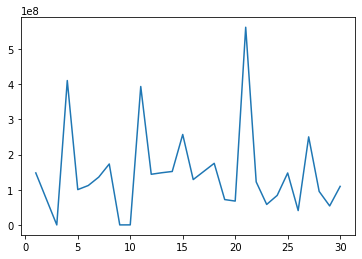

In [79]:
plt.plot(cobro_por_dia.index,cobro_por_dia)
plt.savefig('resultados_datasets/plot_por_dia.jpg')